<a href="https://colab.research.google.com/github/Seb85vickz/DAS7000Data_Analytics_and_Visualization/blob/main/Case_Study_Scraping%2C_Cleaning__Exploratory_Analysis(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study: “Scraping, Cleaning & Exploratory Analysis of FilmCrave’s Top 1000 Movies” https://www.filmcrave.com/list_top_movie.php

Imagine you’re a data analyst intern at a media analytics firm called CineScope Analytics.
Your manager has asked you to research patterns and trends in movie data - ratings, genres, directors, and languages - to help a streaming startup decide what kind of films to invest in for their next global release.

You’ve been tasked with creating a data-driven report based on real-world data from the website FilmCrave - which lists the Top 1000 Movies of all time.

Your job starts from scratch: collecting, cleaning, and analyzing the data.



#Learning Goals

By the end of this project, you will be able to:

Scrape web data (HTML parsing) from multiple pages.

Structure data into a usable format (CSV file).

Identify and handle missing values.

Clean and standardize data for analysis.

Perform exploratory visualizations to uncover insights.



#Lets divide all goals in different phases

#Phase 1: Web Scraping – “Catching the Data”

Website: FilmCrave Top 1000 Movies https://www.google.com/url?q=https%3A%2F%2Fwww.filmcrave.com%2Flist_top_movie.php

Your first goal is to scrape the Top 1000 Movies.

Each page on FilmCrave lists 10 movies, so you’ll need to loop through 100 pages in total.

For each movie, extract the following information:

Field	Description

title	Name of the movie

year_of_release	Year movie was released

overall_rating	FilmCrave rating (out of 5)

language	Main language (if available)

genre	Primary genre(s)

mpaa_rating	Age rating (G, PG, R, etc.)

director	Director(s) name

actors	List of main actors

plot	Short summary of the movie

#Hints for Scraping

Use requests to fetch each page.

Parse the HTML using BeautifulSoup.

Each movie block is contained in a <div class="movie"> or similar structure.

Extract sub-elements (e.g., title, year, rating, etc.).

Create a list of dictionaries and convert it into a pandas DataFrame.

Save the result to a CSV file:

df.to_csv("filmcrave_top_1000.csv", index=False)



In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_filmcrave(pages=100, output_csv="top1000movies.csv"):
    base_url = "https://www.filmcrave.com/list_top_movie.php?page={}"

    column_names = [
        'Title',
        'Year of Release',
        'Overall Rating',
        'Language',
        'Genre',
        'MPAA Rating',
        'Director',
        'Actors',
        'Plot'
    ]

    df = pd.DataFrame(columns=column_names)


    for page in range(1, pages + 1):
        url = base_url.format(page)


        try:
            response = requests.get(url, timeout=10)
        except requests.exceptions.RequestException as e:
            print(f"Error fetching page {page}: {e}")
            continue

        if response.status_code != 200:
            print(f"Failed to retrieve page {page}. Status code: {response.status_code}")
            continue

        #Parsing the HTML
        soup = BeautifulSoup(response.text, 'html.parser')

        #Where the movies are located
        movie_blocks = soup.find_all('div', class_='detail-box')

        #quick check to see if the block where the movies are even exist
        if not movie_blocks:
            print(f" No movies found on page {page}")
            continue

        #for each of the 10 movies
        for block in movie_blocks:
            # Title
            h2_tag = block.find('h2')
            if h2_tag:
                a_tag = h2_tag.find('a')
                title = a_tag.get_text(strip=True) if a_tag else None
            else:
                title = None
                print("h2 tag(Title) not found in detail-box")

            # Details
            details = {}
            p_tag = h2_tag.find_next_sibling('p') if h2_tag else None

            if p_tag:
                for span in p_tag.find_all('span', class_='grey-bold'):
                    key = span.get_text(strip=True).rstrip(':')
                    next_node = span.next_sibling
                    if next_node is None:
                        value = ''
                    elif getattr(next_node, 'name', None):  # another tag
                        value = next_node.get_text(strip=True)
                    else:  # plain text
                        value = next_node.strip()
                    details[key] = value
            else:
                print("p (movie details) tag not found")

            #Create a hashmap "key": "value"
            row = {
                'Title': title,
                'Year of Release': details.get('Year of Release'),
                'Overall Rating': details.get('Overall Rating'),
                'Language': details.get('Language'),
                'Genre': details.get('Genre'),
                'MPAA Rating': details.get('MPAA Rating'),
                'Director': details.get('Director'),
                'Actors': details.get('Actors'),
                'Plot': details.get('Plot')
            }

            df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

        print(f"Successfully scraped page {page} with {len(movie_blocks)} movies")

    df.to_csv(output_csv, index=False, encoding="utf-8")
    print(f"Saved {len(df)} movies to {output_csv}")

    return df

# MAIN
movies_df = scrape_filmcrave(pages=100, output_csv="top1000movies.csv")



Successfully scraped page 1 with 10 movies
Successfully scraped page 2 with 10 movies
Successfully scraped page 3 with 10 movies
Successfully scraped page 4 with 10 movies
Successfully scraped page 5 with 10 movies
Successfully scraped page 6 with 10 movies
Successfully scraped page 7 with 10 movies
Successfully scraped page 8 with 10 movies
Successfully scraped page 9 with 10 movies
Successfully scraped page 10 with 10 movies
Successfully scraped page 11 with 10 movies
Successfully scraped page 12 with 10 movies
Successfully scraped page 13 with 10 movies
Successfully scraped page 14 with 10 movies
Successfully scraped page 15 with 10 movies
Successfully scraped page 16 with 10 movies
Successfully scraped page 17 with 10 movies
Successfully scraped page 18 with 10 movies
Successfully scraped page 19 with 10 movies
Successfully scraped page 20 with 10 movies
Successfully scraped page 21 with 10 movies
Successfully scraped page 22 with 10 movies
Successfully scraped page 23 with 10 movi

In [2]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            1000 non-null   object
 1   Year of Release  1000 non-null   object
 2   Overall Rating   1000 non-null   object
 3   Language         999 non-null    object
 4   Genre            1000 non-null   object
 5   MPAA Rating      998 non-null    object
 6   Director         1000 non-null   object
 7   Actors           996 non-null    object
 8   Plot             959 non-null    object
dtypes: object(9)
memory usage: 70.4+ KB


#Phase 2: Data Cleaning – “Fixing the Frame”

Once you have the CSV, you might notice:

Inconsistent text cases (e.g., “Drama”, “drama”, “DRAMA”)

Missing values for language or director

Unnecessary whitespace

Ratings stored as text instead of numeric

Your task:

Standardize column names (lowercase_with_underscores).

Convert datatypes appropriately (year_of_release → int, overall_rating → float).

Trim strings and fix capitalization for categorical variables.

Handle missing values:

If no missing values exist, create them artificially:

import numpy as np

df.loc[df.sample(frac=0.05).index, 'language'] = np.nan


Then practice imputation:

Use mode for categorical data.

Use mean/median for numerical data.

Save the cleaned dataset as:

filmcrave_cleaned.csv



In [3]:
#data cleaning on csv generated
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("top1000movies.csv")

# Convert column names to lowercase with underscores (Removing whitespaces)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Extract the numerical rating from 'overall_rating' and convert to float
df['overall_rating'] = df['overall_rating'].str.split(' ', expand=True)[0].astype(float)

# Insert NR for Missing value in MP Rating
df['mpaa_rating'] = df['mpaa_rating'].fillna('NR')

# Missing values for language or director
df['language'] = df['language'].fillna('Unknown')
df['actors'] = df['actors'].fillna('Unknown')
df['plot'] = df['plot'].fillna('No Plot')

# Display the first few rows of the cleaned DataFrame
display(df.head())

# Display the info of the cleaned DataFrame to check data types and non-null counts
display(df.info())

# Save the cleaned dataset as: filmcrave_cleaned.csv
df.to_csv("filmcrave_cleaned.csv", index=False)

,title,year_of_release,overall_rating,language,genre,mpaa_rating,director,actors,plot
0,The Shawshank Redemption,1994,3.5,English,Drama,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","A young banker named Andy, has his life change..."
1,Fight Club,1999,3.3,English,Drama/Crime,R,David Fincher,"Edward Norton, Brad Pitt, Helena Bonham Carter...",An average thirty-something office worker gets...
2,The Godfather,1972,3.5,English,Drama/Crime,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Robert D...",An organized crime leader gives up control of ...
3,The Dark Knight,2008,3.4,English,Action/Adventure,PG-13,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Batman raises the stakes in his war on crime. ...
4,Pulp Fiction,1994,3.4,English,Crime/Drama,R,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Bruce Willis...",A story of four interweaving stories developin...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1000 non-null   object 
 1   year_of_release  1000 non-null   int64  
 2   overall_rating   1000 non-null   float64
 3   language         1000 non-null   object 
 4   genre            1000 non-null   object 
 5   mpaa_rating      1000 non-null   object 
 6   director         1000 non-null   object 
 7   actors           1000 non-null   object 
 8   plot             1000 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 70.4+ KB


None

#Phase 3: Exploratory Data Analysis (EDA) - “Telling the Story”

Now that your data is clean, dive into visual storytelling using Python’s data visualization libraries (matplotlib, seaborn, plotly, etc.).

Analysis Ideas

Question	Visualization

Which years produced the most top-rated films?

What are the most common genres?	Bar chart of genre frequency

Which directors appear most often?	Horizontal bar chart

What’s the relationship between year and overall rating? Scatter plot

Compare distributions of ratings across genres- Box plot

Language distribution in top movies -	Pie chart or bar chart

#Visualization Examples (hint for students). However, we are expecting more than these.

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

df = pd.read_csv("filmcrave_cleaned.csv")

# Rating distribution
sns.histplot(df["overall_rating"], bins=10, kde=True)

plt.title("Distribution of Overall Ratings")

plt.xlabel("Rating")

plt.ylabel("Count")

plt.show()

# Top 10 Genres
top_genres = df["genre"].value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index)

plt.title("Top 10 Genres in FilmCrave Top 1000")

plt.xlabel("Number of Movies")

plt.ylabel("Genre")

plt.show()

# Year vs Rating
sns.scatterplot(x="year_of_release", y="overall_rating", data=df)

plt.title("Ratings Over the Years")

plt.xlabel("Year of Release")

plt.ylabel("Overall Rating")

plt.show()



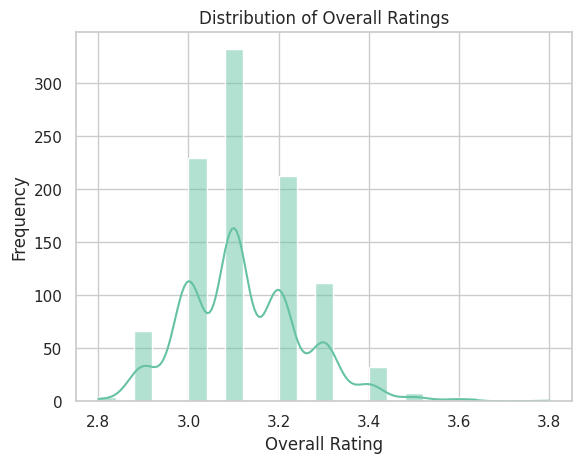

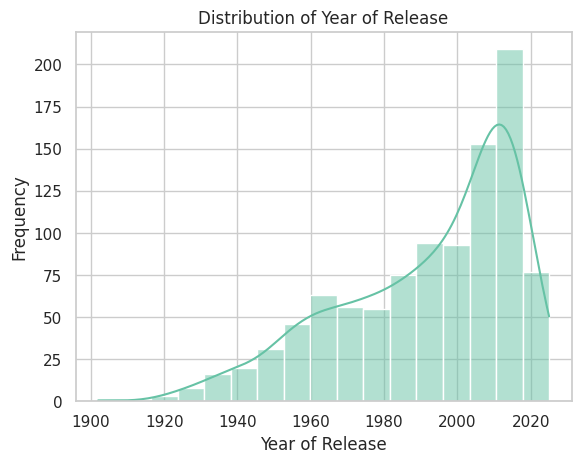

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("Set2")

# Visualize the distribution of overall_rating
sns.histplot(df['overall_rating'], kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of year_of_release
sns.histplot(df['year_of_release'], kde=True)
plt.title('Distribution of Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Frequency')
plt.show()

From the histrograms above we see that the overall distribution of both Overall Ratings and Year of Release.
##Distribution of overall Ratings
A maojrity of the movies fall between a 3.0 and 3.2 out of 4 stars which is to be expected as the normal distribution of things.
##Year of Release
most movies were released after 2000 but its important to note the sharp decline that was mostly caused by covid, making it hard to produce films

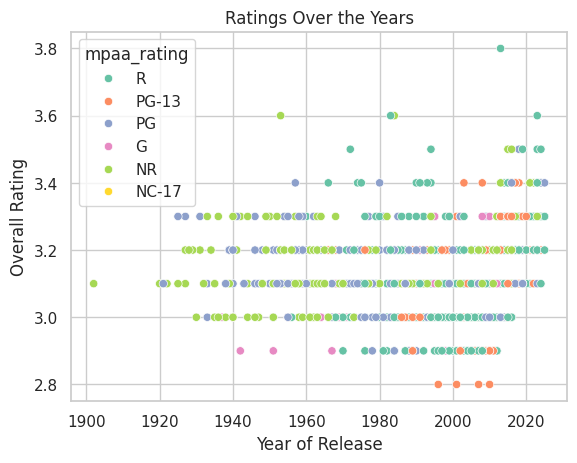

In [5]:
# Plot Year vs Rating
sns.scatterplot(x="year_of_release", y="overall_rating", data=df, hue="mpaa_rating")
plt.title("Ratings Over the Years")
plt.xlabel("Year of Release")
plt.ylabel("Overall Rating")
plt.show()

In the above scatter plot combining the two, we notice some things.
- no movie in the dataset has gotten below a 2.8 rating or a bove a 3.8 rating.
-  The lowest Rated movies were released towards the 2000s. this could be attributed to a tank in quality.

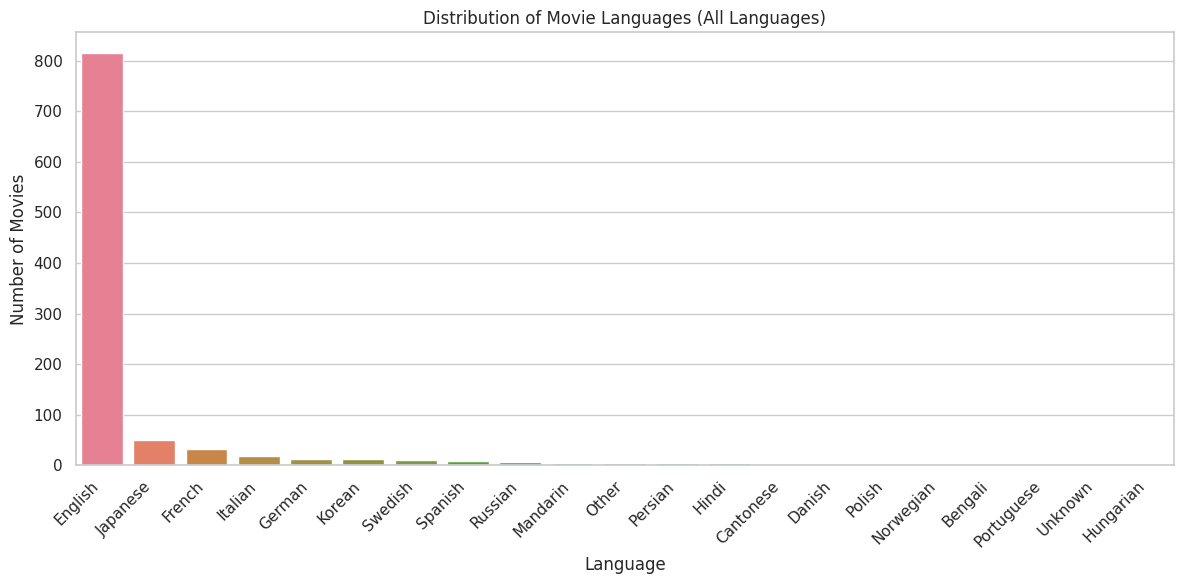

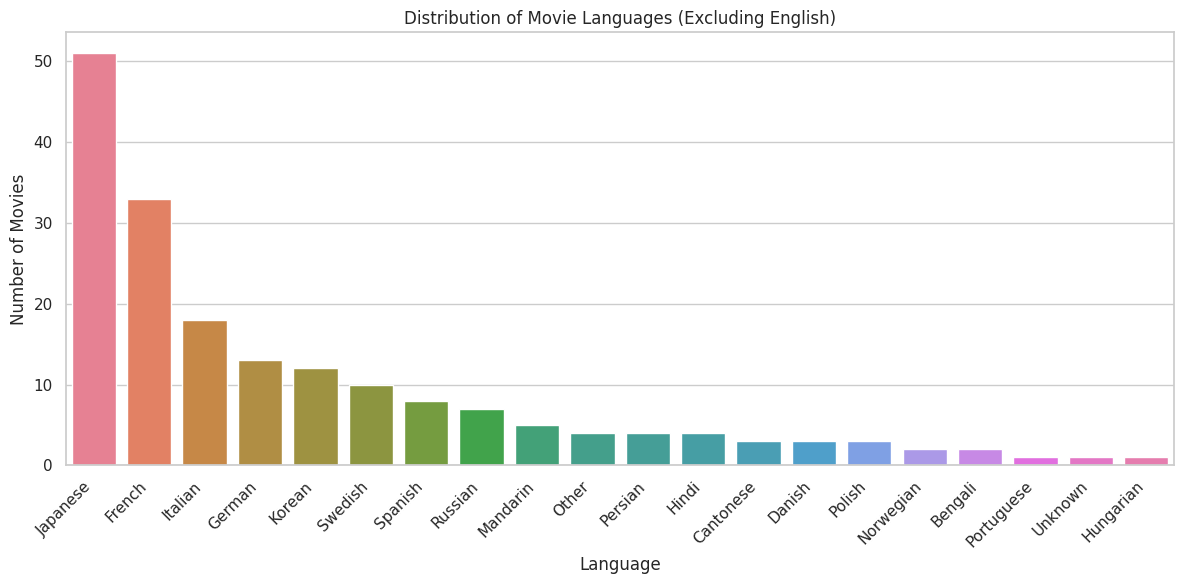

In [13]:
# Get the count of each language
language_counts = df['language'].value_counts()

# Plotting the bar chart for all languages (original plot for context)
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, hue=language_counts.index, legend=False)
plt.title('Distribution of Movie Languages (All Languages)')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter out 'English' to better visualize other languages
non_english_languages = language_counts[language_counts.index != 'English']

# Plotting the bar chart for non-English languages
plt.figure(figsize=(12, 6))
sns.barplot(x=non_english_languages.index, y=non_english_languages.values, hue=non_english_languages.index, legend=False)
plt.title('Distribution of Movie Languages (Excluding English)')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

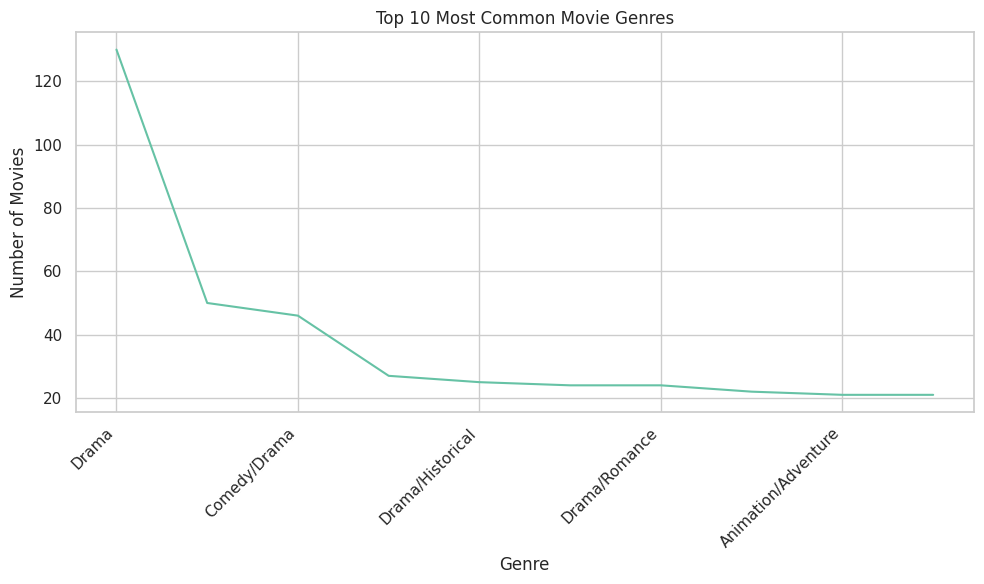

In [7]:
import matplotlib.pyplot as plt

# Get the count of each genre
genre_counts = df['genre'].value_counts()

# Display the most common genres
#print("Most Common Genres:")


# Plotting the bar chart for the top 10 genres
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='line')
plt.title('Top 10 Most Common Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most Frequent Directors:


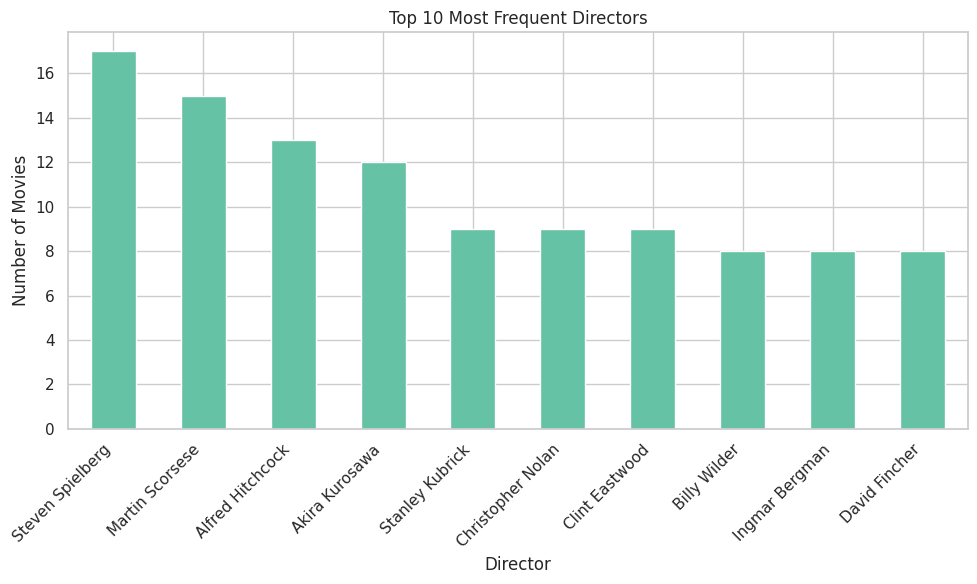

In [8]:
# Get the count of each director
director_counts = df['director'].value_counts()

# Display the most frequent directors
print("Most Frequent Directors:")
#display(director_counts.head(10))

# Optional: Plotting the bar chart for the top 10 directors
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
director_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Phase 4: Insights & Business Angle – “Making It Useful”

As a data analyst for CineScope Analytics, summarize your findings as if you were presenting to management:

Which decades produced the most acclaimed movies?

Do newer films receive higher ratings than older ones?

Are certain genres (e.g., Drama, Thriller) more likely to appear in the Top 1000?

What languages dominate the global cinema landscape?

Who are the most frequent directors in top-rated films?

These insights will help guide content acquisition and recommendation strategies for streaming platforms.



/tmp/ipython-input-938203853.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='decade', y='overall_rating', data=decade_stats, palette='viridis')


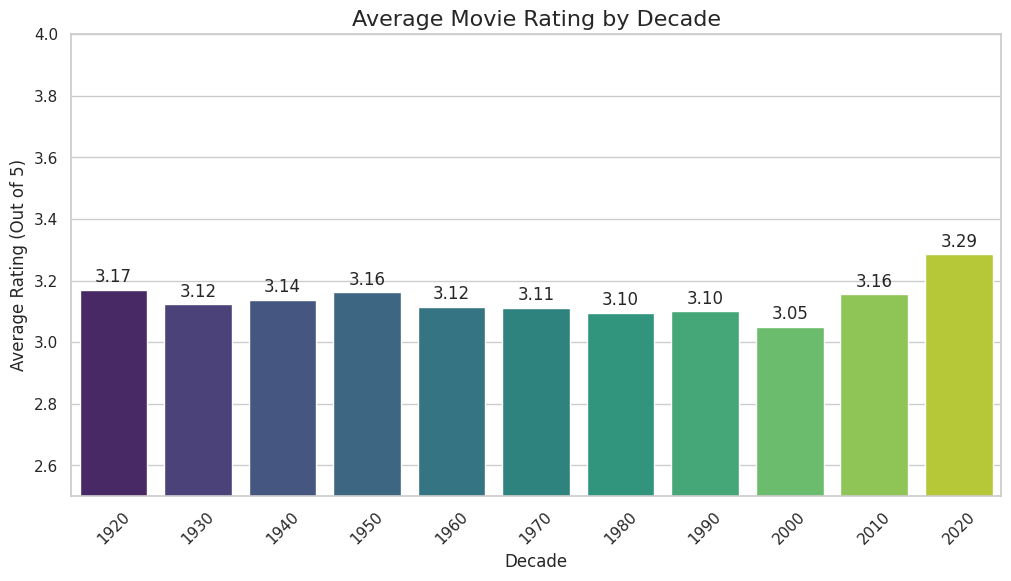

In [9]:
# Create a 'decade' column
df['decade'] = (df['year_of_release'] // 10) * 10

# Filter out potential bad data (e.g., years like 0 or 2025 if not released)
df_decades = df[df['decade'] > 1900]

# Calculate mean rating per decade
decade_stats = df_decades.groupby('decade')['overall_rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='decade', y='overall_rating', data=decade_stats, palette='viridis')

plt.title('Average Movie Rating by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Rating (Out of 5)', fontsize=12)
plt.ylim(2.5, 4.0) # Zoom in to see differences better
plt.xticks(rotation=45)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()

/tmp/ipython-input-1318258672.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='primary_genre', y='overall_rating', data=df_top_genres, palette='Set3', order=top_genres_list)


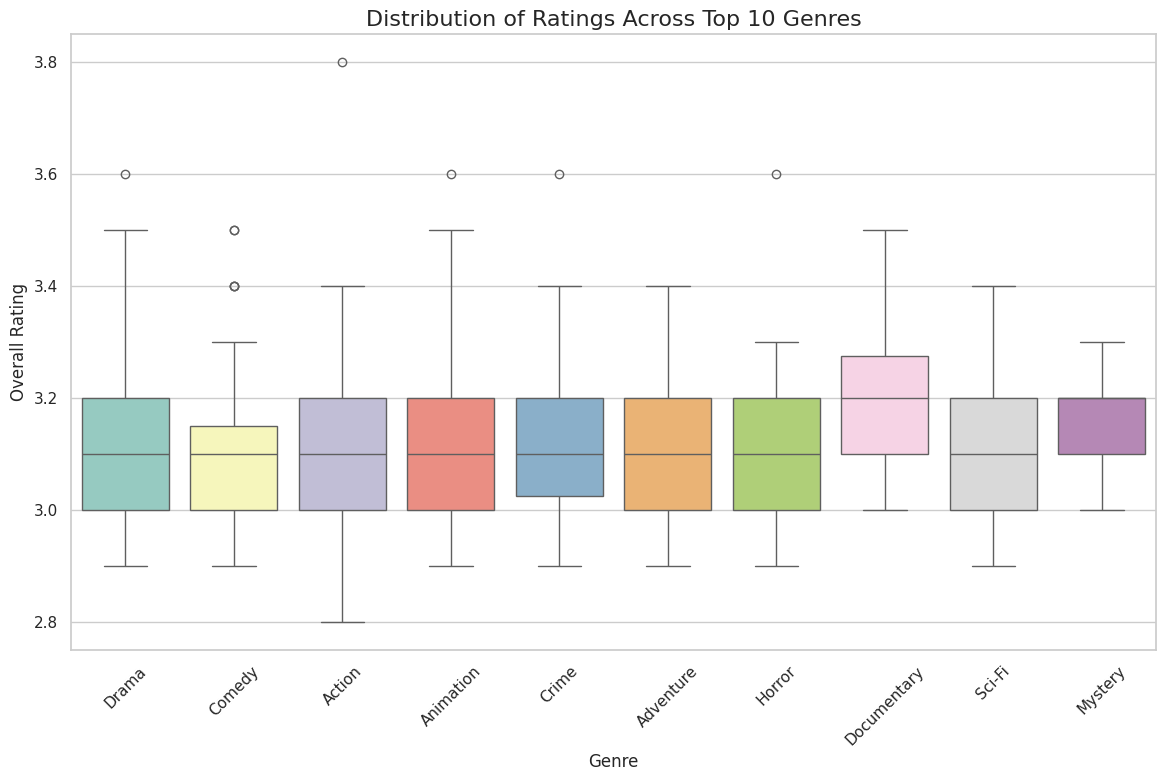

In [10]:
# 1. Clean the Genre column (Some movies have multiple genres like "Action/Adventure")
# We will take the primary genre (the first one listed) for cleaner grouping
df['primary_genre'] = df['genre'].apply(lambda x: str(x).split('/')[0].strip())

# 2. Identify the Top 10 most frequent genres to keep the chart readable
top_genres_list = df['primary_genre'].value_counts().head(10).index
df_top_genres = df[df['primary_genre'].isin(top_genres_list)]

# 3. Create Box Plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='primary_genre', y='overall_rating', data=df_top_genres, palette='Set3', order=top_genres_list)

plt.title('Distribution of Ratings Across Top 10 Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-183528372.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette='rocket')


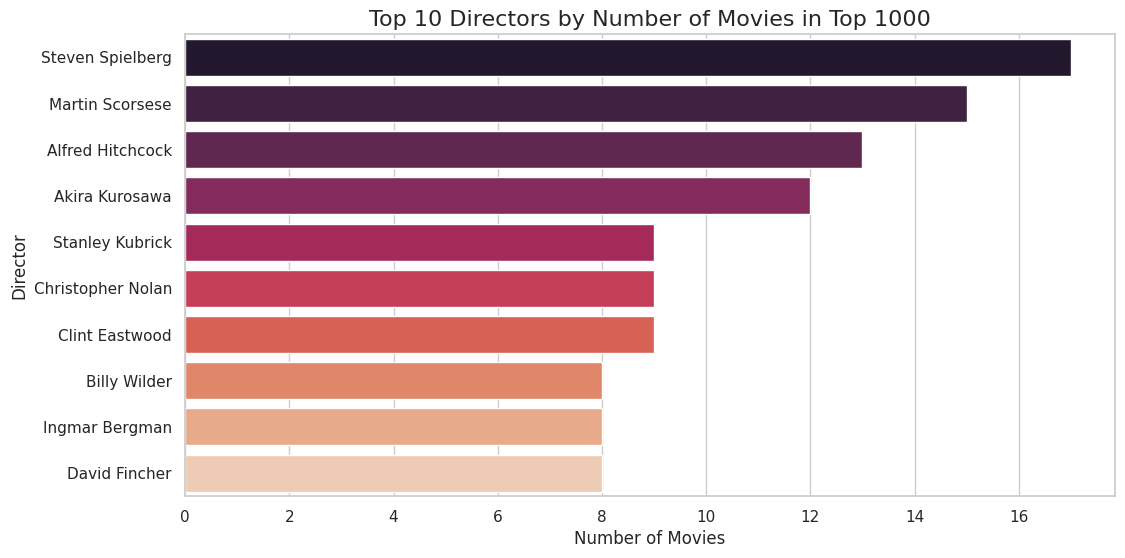

In [11]:
# Count movies per director
director_counts = df['director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='rocket')

plt.title('Top 10 Directors by Number of Movies in Top 1000', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.show()

# Report: FilmCrave Top 1000 Movies Analysis
This report summarizes key findings from the FilmCrave Top 1000 Movies dataset to inform content acquisition and recommendation strategies for streaming platforms.

## Key Findings
- Rating Distribution: The majority of top-rated movies cluster in a narrow range of 3.0 to 3.2 out of 4 stars.

- Year of Release: The dataset has a higher frequency of films released after 2000. A recent drop is likely due to external factors like the COVID-19 pandemic.

- Year vs. Rating: There is no strong linear correlation. However, the lowest-rated movies in this top 1000 list tend to be clustered around the 2000s.

- Decades and Acclaim: While the 2020s show the highest average rating, this may be due to a smaller sample size. The volume of acclaimed films from other decades is also a key consideration.

- Language Distribution: English is dominant. However, Japanese, French, and Italian films have a significant presence, highlighting the importance of international cinema.

- Most Common Genres: Drama is the most prevalent genre, often combined with Crime and Comedy. Action and Adventure are also prominent.

- Most Frequent Directors: Directors like Steven Spielberg, Martin Scorsese, and Alfred Hitchcock appear multiple times, making them key figures for content acquisition.

- Content Strategy Implications
Acquisition:

- Focus on acquiring a diverse library with a strong emphasis on Drama and its subgenres.

- Balance a robust English-language selection with strategic acquisition of acclaimed international films (e.g., from Japan, France, Italy).

- Target the works of highly-ranked directors.

## Recommendation:

- Use genre and director data to enhance recommendation engines.

- Fine-tune algorithms to suggest films within the common 3.0-3.2 rating range.

## Future Investment:

- Analyze successful 2020s films to identify emerging trends.

- Investigate the lower-rated films from the 2000s to avoid similar pitfalls.

## Next Steps
- Analyze the characteristics of 2020s films to understand their high average rating.

- Investigate the reasons behind the lower-rated films in the 2000s.

- Explore the relationship between MPAA ratings and overall ratings.

- Conduct a deeper analysis of genre combinations and their impact on ratings.

## Conclusion
These insights provide a foundational understanding of the FilmCrave Top 1000 dataset, enabling CineScope Analytics to optimize content and recommendation strategies for its streaming partners.

Deliverables

File	Description

filmcrave_top_1000.csv	Raw scraped data

filmcrave_cleaned.csv	Cleaned and formatted data

filmcrave_EDA.ipynb	Notebook that should contain visualizations and insights

Short business report that should summarise findings in .ipynb file only